In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("(Rows,Columns):", data.shape)

(Rows,Columns): (891, 12)


Knowing the shape(How many rows and columns exist) in the data.

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Knowing the columns in the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



Cabin and age has missing values, out of 12 coulmns 5 are object(text), 5 are int64(numbers) and 2 are float(in decimal points) Name, Sex, Ticket, Cabin, Embarked are text data type. remaining are numericals. Age,Cabin and Embarked has missing values.

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Describing the dataset about mean, std, min, 25%, 50%, 75%, max, count.

# DATA PREPROCESSING

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To know how many null values exist in each columns.

In [7]:
data['Age'].fillna(method='ffill', inplace=True)
data['Cabin'].fillna(method='bfill', inplace=True)
data['Cabin'].fillna(method='ffill', inplace=True)
data['Embarked'].fillna(method='bfill', inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Filling Null values in 'Age','Embarked,'Cabin' using Forward and Backward fill.

# DATA VISUALIZATION

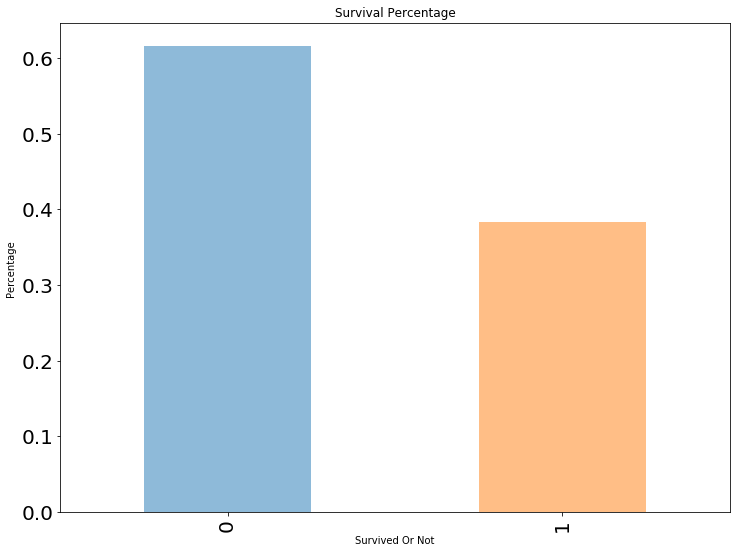

In [8]:
plt.figure(figsize=(12,9))
data['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.savefig('Survival.png')
plt.title("Survival Percentage")
plt.show()

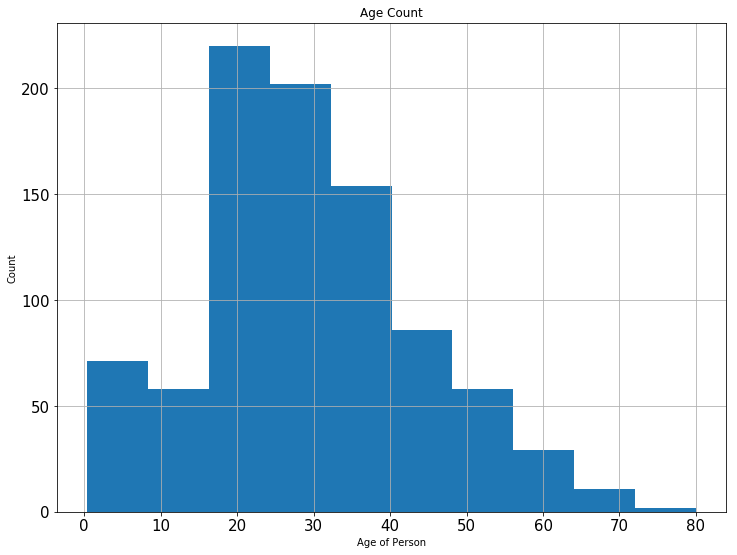

In [9]:
plt.figure(figsize=(12,9))
data.Age.hist()
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Age of Person')
plt.ylabel('Count')
plt.savefig('Age.png')
plt.title("Age Count")
plt.show()

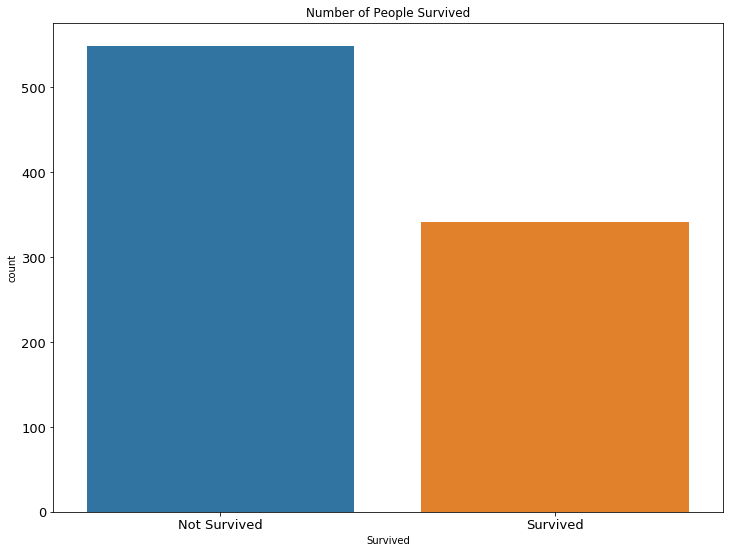

In [10]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', data=data)
label=['Not Survived','Survived']
plt.xticks(data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.savefig('survived_people.png')
plt.title("Number of People Survived")
plt.show()

Text(0.5,1,'Number of People Survived based On Sex')

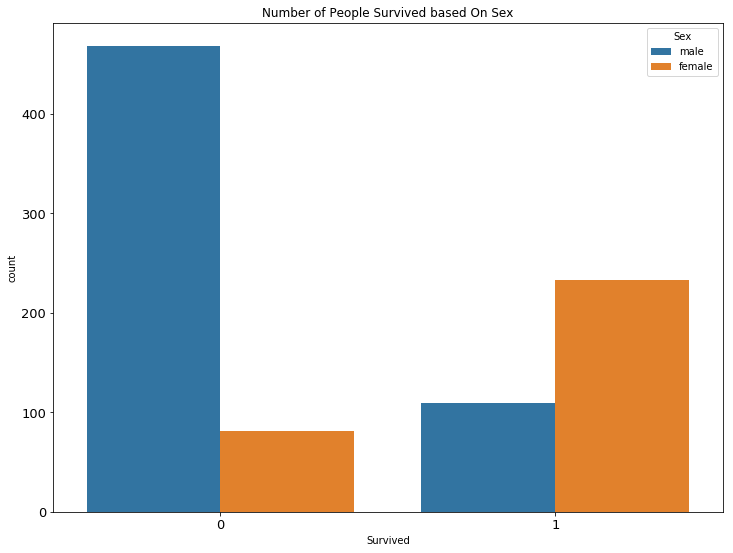

In [11]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig('Survival_gender.png')
plt.title("Number of People Survived based On Sex")

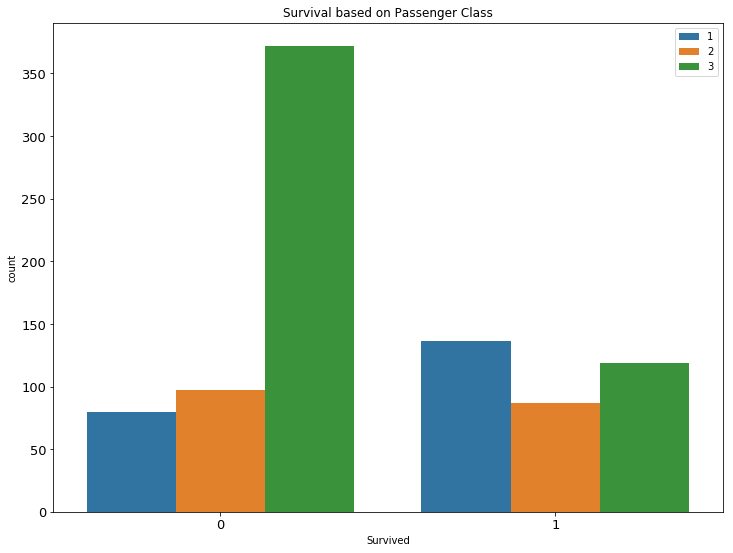

In [12]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig('Survival_Pclass.png')
plt.title('Survival based on Passenger Class')
plt.legend(loc='best')
plt.show()

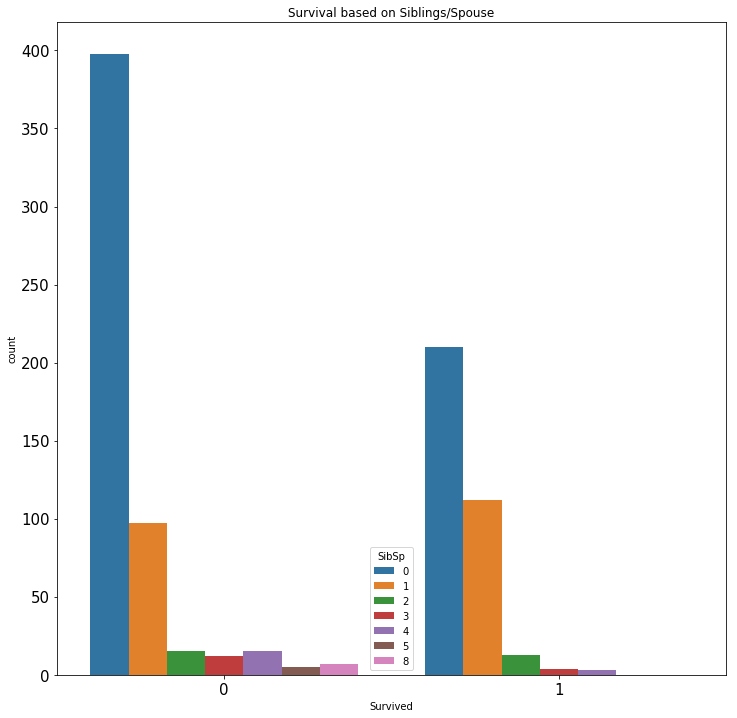

In [13]:
plt.figure(figsize=(12,12))
sns.countplot(x='Survived', hue='SibSp', data=data)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('Survival_sibling.png')
plt.title("Survival based on Siblings/Spouse")
plt.show()

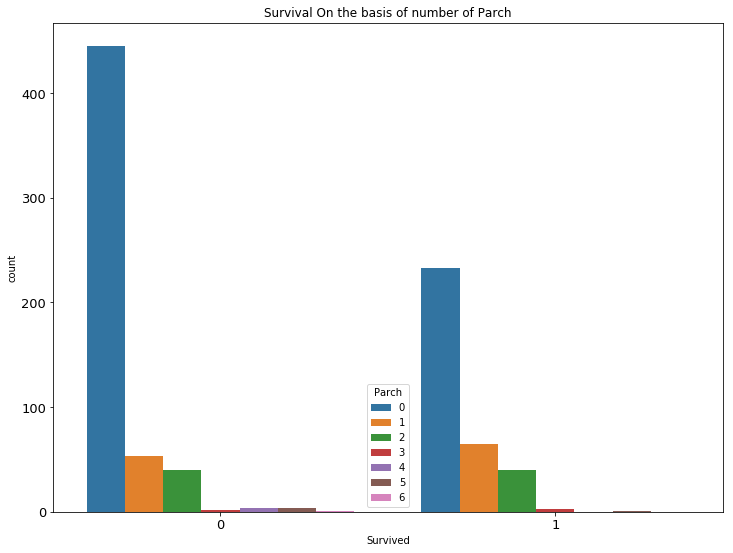

In [14]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', hue='Parch', data=data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig('Survival_parch.png')
plt.title('Survival On the basis of number of Parch')
plt.show()

In [15]:
data.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S



It is important to note that the Sex and Embarked column are object and have string values. Therefore they cannot be directly be replaced by the numbers. (May cause bias in the algorithm) To counter the problem we use One Hot Encoder using get_dummies()

# PERFORMING get_dummies

In [16]:
Sex=pd.get_dummies(data['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


get_dummies is used to seperate each string with a passed seperator.

In [17]:
Pclass=pd.get_dummies(data['Pclass'])
Pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [18]:
Embarked=pd.get_dummies(data['Embarked'])
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
data=pd.concat([data,Pclass,Sex,Embarked], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


Concatenation of data with Pclass, Sex, Embarked.

In [20]:
data.drop(['Sex','Embarked','Pclass'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1



# SLICING 

In [21]:
x,y=data.drop(['Survived'],axis=1),data['Survived']
x.head()

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [22]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
x.shape

(891, 13)

In [24]:
y.shape

(891,)

# TRAINING, TESTING SPLITTING OF DATA.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=40)
x_train.shape, x_test.shape, y_train.shape,  y_test.shape

((623, 13), (268, 13), (623,), (268,))

In [26]:
x_test.head(3)

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
246,247,25.0,0,0,7.775,0,0,1,1,0,0,0,1
588,589,22.0,0,0,8.050,0,0,1,0,1,0,0,1
472,473,33.0,1,2,27.750,0,1,0,1,0,0,0,1


# APPLYING CLASSIFICATION ALGORITHMS.

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
predlr=lr.predict(x_test)
predlr

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(confusion_matrix(y_test, predlr))

[[130  26]
 [ 25  87]]


In [30]:
print(classification_report(y_test, predlr))

             precision    recall  f1-score   support

          0       0.84      0.83      0.84       156
          1       0.77      0.78      0.77       112

avg / total       0.81      0.81      0.81       268



In [31]:
acc_logreg=round(accuracy_score(predlr, y_test)*100, 2)
print(acc_logreg)

80.97


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc=rfc.predict(x_test)
pred_rfc

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [33]:
print(confusion_matrix(y_test, pred_rfc))

[[143  13]
 [ 35  77]]


In [34]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.80      0.92      0.86       156
          1       0.86      0.69      0.76       112

avg / total       0.83      0.82      0.82       268



In [35]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [37]:
a=pd.get_dummies(test['Sex'])
a.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [38]:
b=pd.get_dummies(test['Embarked'])
b.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [39]:
c=pd.get_dummies(test['Pclass'])
c.head()

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [40]:
import pandas as pd
test=pd.concat([test,a,b,c], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0,0,0,1
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1,0,0,1


In [41]:
test.drop(['Sex','Pclass','Embarked'], axis=1, inplace=True)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [42]:
x.shape[1]

13

In [43]:
test.shape[1]

13

In [44]:
#test.drop(columns=['PassengerId'], axis=1, inplace=True)
#test.head()

In [45]:
p=test.drop(['PassengerId'], axis=1)
q=test['PassengerId']
q.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [46]:
test.isnull().sum()

PassengerId     0
Age            86
SibSp           0
Parch           0
Fare            1
female          0
male            0
C               0
Q               0
S               0
1               0
2               0
3               0
dtype: int64

In [47]:
test['Age'].fillna((data['Age'].mean()), inplace=True)
test['Fare'].fillna((data['Fare'].mean()), inplace=True)
test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
1              0
2              0
3              0
dtype: int64

# PREDICTING VALUES IN 'TEST' DATASET.

In [48]:
final_prediction = rfc.predict(test)
final_prediction

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
submission_file=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': final_prediction})
submission_file.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0


In [50]:
submission_file.to_csv('Survival.csv')